In [265]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import datetime
import os
from astropy.timeseries import LombScargle 
from jdcal import gcal2jd
from CosinorPy import cosinor, cosinor1

In [303]:
def data_orgaziner(file_name):

    col_names = ["Index", "DateD", "DateM", "DateY", "Time", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused", "Light"]
    
    for i in range(1, 33):
        col_names.append(f"Sp{i}")
    
    folder_path = 'Data'
    file_path = os.path.join(folder_path, file_name)
    
    df = pd.read_csv(file_path, names=col_names, sep='\s+', header=None)
    df = df.set_index('Index')
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')
    deleted_data = df[df["MonStatus"] != 1]
    #print(f"Removed rows of data where Monitor Status is not 1: {len(deleted_data)}\n")
    df = df[df["MonStatus"] == 1]
    
    
    month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
    df['DateM'] = df['DateM'].str[:3].map(month_map)
    df['DateY'] = df['DateY'].apply(lambda x: int(str(20) + str(x)))
    df['Date'] = pd.to_datetime(dict(year=df['DateY'], month=df['DateM'], day=df['DateD']), errors='coerce')
    
    df['Time'] = pd.to_datetime(dict(year=df['Date'].dt.year,
                                         month=df['Date'].dt.month,
                                         day=df['Date'].dt.day,
                                         hour=df['Time'].dt.hour,
                                         minute=df['Time'].dt.minute,
                                         second=df['Time'].dt.second))
    
    df = df.drop(["DateD", "DateM", "DateY", "Date", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused"], axis=1)
    
    day_map = {day: idx+1 for idx, day in enumerate(df['Time'].dt.day.unique())}
    
    df.insert(0, 'Day', df['Time'].dt.day.map(day_map))
    
    spiders = []
    
    for i in range(1, 33):
        if df[f"Sp{i}"].sum() > 10:
            spiders.append(i)
        if not i in spiders:
            df = df.drop([f"Sp{i}"], axis=1)

    return df, spiders

def naming_pattern(file_name):
    print(file_name.split(' ', 2))
    group_name = file_name.split(' ', 2)[0]
    light_condition = file_name.split(' ', 2)[1]
    start_date = file_name.split(' ', 2)[2].split('-', 1)[0]
    
    path = group_name + "_" + light_condition + "_" + start_date
    
    two_lights = False
    if "-" in light_condition:
        #li_con_1, li_con_2 = light_condition.split('-', 1)
        two_lights = True

    return group_name, light_condition, start_date, path, two_lights

In [307]:


file_name = 'StB LD-DD 1212-1224-2023.txt'

df, spiders = data_orgaziner(file_name)

display(df)

group_name, light_condition, start_date, path, two_lights = naming_pattern(file_name)

print(group_name, light_condition, start_date, path, two_lights)


"""

folder_path = 'Data'
files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

for file_name in files:
    print(file_name, "\n")
    df, spiders = data_orgaziner(file_name)
    #display(df)
    group_name, light_condition, start_date, path, two_lights = naming_pattern(file_name)
    print(group_name, light_condition, start_date, spiders, "\n")

"""




,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp14,Sp15,Sp16,Sp17,Sp18,Sp19,Sp20,Sp21,Sp22,Sp23
Index,,,,,,,,,,,,,,,,,,,,,
1,1,2023-12-13 12:54:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2023-12-13 13:58:00,1,18,66,13,61,14,17,16,...,9,10,31,22,17,5,26,5,12,9
2,1,2023-12-13 13:59:00,1,3,0,3,1,2,3,0,...,2,3,1,3,2,4,0,0,0,2
3,1,2023-12-13 14:00:00,1,1,4,2,0,2,2,1,...,6,2,2,4,4,2,0,0,0,2
4,1,2023-12-13 14:01:00,1,5,6,0,0,5,3,2,...,2,2,0,2,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15835,12,2023-12-24 13:52:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15836,12,2023-12-24 13:53:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15837,12,2023-12-24 13:54:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


['StB', 'LD-DD', '1212-1224-2023.txt']
StB LD-DD 1212 StB_LD-DD_1212 True


'\n\nfolder_path = \'Data\'\nfiles = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]\n\nfor file_name in files:\n    print(file_name, "\n")\n    df, spiders = data_orgaziner(file_name)\n    #display(df)\n    group_name, light_condition, start_date, path, two_lights = naming_pattern(file_name)\n    print(group_name, light_condition, start_date, spiders, "\n")\n\n'

# Light code

In [179]:
def light_code(df):
    LL_days = []
    LD_days = []
    
    for j in range(1, len(df['Day'].unique()) + 1):
        curr_df = df[df['Day']==j]
    
        if curr_df['Light'].sum() > 10:
            print(curr_df['Light'].sum())
            if curr_df['Light'].sum() > 1000:
                LL_days.append(j)
            else:
                LD_days.append(j)
    
    condition_days = {}
    
    condition_days['LD'] = LD_days
    
    condition_days['DD'] = [x for x in df['Day'].unique() if not x in LL_days and not x in LD_days]
    
    condition_days['LL'] = LL_days
    
    
    """
    if two_lights:
        name_wrong = li_con_1 == 
        
    if light_condition == 
    
    li_con_1, li_con_2
    """
    
    condition_keys = [key for key in condition_days if condition_days[key]]

    return condition_days, condition_keys
    


In [213]:
condition_days, condition_keys = light_code(df)
print(condition_days)

206
721
721
721
721
721
721
721
721
721
721
139
96
720
720
721
721
721
721
721
246
{'LD': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], 'DD': [], 'LL': []}


# Raster Plot Code

In [92]:
def raster_plot_2(sp, fig, light_con):
    for j in condition_days[light_con]:
        curr_df = df[df['Day']==j]

        curr_df_avg = curr_df.groupby(curr_df['Time'].dt.hour)[sp].mean()
    
        ax = fig.add_subplot(len(df['Day'].unique()), 1, j)
        ax.set_ylabel(f"Day {j}", rotation="horizontal", va="center", ha="right", fontsize=8)

        
        for k in range(0, len(curr_df) -1):
            start_time = curr_df['Time'].iloc[k]
            end_time = curr_df['Time'].iloc[k + 1]
            if curr_df['Light'].iloc[k] == 1:
                ax.axvspan(start_time.hour + start_time.minute / 60, end_time.hour + end_time.minute / 60, color='yellow', alpha=0.3)

        curr_df_avg.plot.bar(y = [sp], ax=ax)
        
        ax.set_ylim(0, 1)
        ax.legend().remove()
        ax.tick_params(left=False, bottom=False)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xlim(-0.5, 23.5)
        ax.set_xlabel("")
        
        if j == condition_days[light_con][0]:
            ax.set_title(f"{group_name} {sp.split('p', 2)[1]}")
            #ax.text(0.5, 1.5, x, fontsize=12, horizontalalignment='center', transform=ax.transAxes)
            
        if j == len(df["Day"].unique()):
            ax.set_xticks(np.arange(0, 25, 2))
            ax.set_xticklabels(np.arange(0, 25, 2), rotation = 'horizontal', fontsize = 7)
            ax.set_xlabel('Time (hours)')
        

    """
    file_path = os.path.join(raster_path, f"{group_name}_{sp.split('p', 2)[1]}_{light_condition}_{start_date}_raster_plot.png")
    plt.savefig(file_path)
    """
    #plt.close()
    plt.show()

In [94]:
def raster_plot(sp, fig, light_con):
    for j in condition_days[light_con]:
        curr_df = df[df['Day']==j]

        #curr_df_avg = curr_df.groupby(curr_df['Time'].dt.hour)[sp].mean()
    
        ax = fig.add_subplot(len(df['Day'].unique()), 1, j)
        ax.set_ylabel(j, rotation="horizontal", va="center", ha="right", fontsize=8)

        
        for k in range(0, len(curr_df) -1):
            start_time = curr_df['Time'].iloc[k]
            end_time = curr_df['Time'].iloc[k + 1]
            if curr_df['Light'].iloc[k] == 1:
                ax.axvspan(start_time.hour * 60 + start_time.minute, end_time.hour * 60 + end_time.minute, color='yellow', alpha=0.3)

        curr_df.plot.bar(y = [sp], ax=ax)
        
        ax.set_ylim(0, 5)
        ax.legend().remove()
        ax.tick_params(left=False, bottom=False)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xlim(-0.5, 1440.5)
        ax.set_xlabel("")
        
        if j == condition_days[light_con][0]:
            ax.set_title(f"{group_name} {sp.split('p', 2)[1]}")
            #ax.text(0.5, 1.5, x, fontsize=12, horizontalalignment='center', transform=ax.transAxes)
            
        if j == len(df["Day"].unique()):
            ax.set_xticks(np.arange(0, 25, 2))
            ax.set_xticklabels(np.arange(0, 25, 2), rotation = 'horizontal', fontsize = 7)
            ax.set_xlabel('Time (hours)')
        

    """
    file_path = os.path.join(raster_path, f"{group_name}_{sp.split('p', 2)[1]}_{light_condition}_{start_date}_raster_plot.png")
    plt.savefig(file_path)
    """
    #plt.close()
    plt.show()

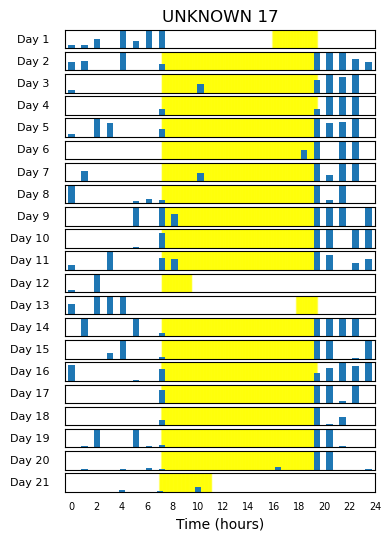

'\nKhA LD 0604-0607-2024\n\nLittle data spiders: 4, 10, 11, 12, 14\n\nNot at the cork spiders (beginning): 4, 9, 11, 12, 13, 14\n\n'

In [233]:
raster_path = path + "_raster_plots"

if not os.path.exists(raster_path):
    os.makedirs(raster_path)


x = "Sp17"

fig1 = plt.figure(figsize=(4, 6))
raster_plot_2(x, fig1, 'LD')

#fig2 = plt.figure(figsize=(4, 6))
#raster_plot_2(x, fig2, 'DD')

"""

for light in condition_keys:
    for i in spiders:
        fig = plt.figure(figsize=(4, 6))
        raster_plot(f"Sp{i}", fig, light)


"""



"""
KhA LD 0604-0607-2024

Little data spiders: 4, 10, 11, 12, 14

Not at the cork spiders (beginning): 4, 9, 11, 12, 13, 14

"""


In [68]:
def datetime_to_jd(dt):
    year, month, day = dt.year, dt.month, dt.day
    hour, minute, second = dt.hour, dt.minute, dt.second
    _, jd = gcal2jd(year, month, day)
    jd += (hour + minute / 60 + second / 3600) / 24
    return jd


# value, display, save, dis+save

def period_LS(df, sp, light_con, result_type='value'):
    if result_type != 'value' and result_type != 'display' and result_type != 'save' and result_type != 'dis+save':
        print("The 'result_type' parameter only takes in 'value', 'display', 'save', 'dis+save'.")
        return None
    
    first_day = condition_days[light_con][0]
    last_day = condition_days[light_con][-1]
    
    curr_df = df[(df["Day"] >= first_day) & (df["Day"] <= last_day)]

    activity = np.array(curr_df[sp])
    time = curr_df['Time'].apply(datetime_to_jd)

    ls = LombScargle(time, activity)
    freq = np.linspace(0.5, 2, len(activity))
    power = ls.power(freq)
    
    max_power = np.max(power)
    max_freq = freq[np.argmax(power)]

    periods = 1 / freq * 24
    power_new = power.copy()

    """
    
    while max_freq > 1.9 or max_freq < 0.75:
        max_power_indices = np.where(power_new == max_power)[0]
        power_new = np.delete(power_new, max_power_indices)
        #periods = np.delete(periods, max_power_indices)
        
        max_power = np.max(power_new)
        max_freq = freq[np.argmax(power_new)]

    """
    
    period = 1 / max_freq
    period *= 24
    #print(f"The Lomb-Scargle approximation of the period is {period} hours.")

    if result_type != 'value':
        plt.figure(figsize=(10, 6))
        plt.plot(periods, power)
        plt.scatter(period, max_power, s=75, c="red")
        plt.xlabel('Period (hours)')
        plt.ylabel('Power')
        plt.xlim(12, 36)
        plt.xticks(np.arange(12, 37, 2))
        plt.title(f'Lomb-Scargle Periodogram for {group_name} {sp.split("p", 2)[1]}')
        
        if result_type == 'display':
            plt.show()

        if result_type == 'save':
            file_path = os.path.join(LS_path, f"LS_{group_name}_{sp.split('p', 2)[1]}_{light_condition}_{start_date}.png")
            plt.savefig(file_path)
            plt.close()

        if result_type == 'dis+save':
            file_path = os.path.join(LS_path, f"LS_{group_name}_{sp.split('p', 2)[1]}_{light_condition}_{start_date}.png")
            plt.savefig(file_path)
            plt.show()

    return period



In [70]:
LS_path = "LS_" + path

if not os.path.exists(LS_path):
    os.makedirs(LS_path)


"""

x = "Sp17"
LS_period_approx = period_LS(df, x, 'LD', 'display')
print(x, 'LD', " ", LS_period_approx, "\n\n\n")



LS_period_approx = period_LS(df, x, 'DD', 'display')
print(x, 'DD', " ", LS_period_approx)

"""

for light in condition_keys:
    for i in spiders:
        LS_period_approx = period_LS(df, f"Sp{i}", 'LD', 'value')
        print(i, light, " ", LS_period_approx)




1 LD   28.81830096508996
2 LD   12.425357032775093
3 LD   25.017790649565576
4 LD   26.708480565371023
5 LD   23.64571316844266
6 LD   12.0
7 LD   12.0
8 LD   43.122125155999285
11 LD   24.508258182186644
12 LD   24.963566931571883
13 LD   25.72011909825606
14 LD   24.426580488790144
15 LD   32.29265687583445
17 LD   24.650631879331435
18 LD   45.17594322002241
19 LD   24.250250651694405
20 LD   23.05738798856053
21 LD   27.23170457104256
22 LD   22.541658900279586
23 LD   39.87996702390767
1 DD   28.81830096508996
2 DD   12.425357032775093
3 DD   25.017790649565576
4 DD   26.708480565371023
5 DD   23.64571316844266
6 DD   12.0
7 DD   12.0
8 DD   43.122125155999285
11 DD   24.508258182186644
12 DD   24.963566931571883
13 DD   25.72011909825606
14 DD   24.426580488790144
15 DD   32.29265687583445
17 DD   24.650631879331435
18 DD   45.17594322002241
19 DD   24.250250651694405
20 DD   23.05738798856053
21 DD   27.23170457104256
22 DD   22.541658900279586
23 DD   39.87996702390767


# Cosinor Period Estimate: Built in Version 

In [17]:
import CosinorPy

In [19]:
from CosinorPy import cosinor_nonlin
def cosinor_period_approx(df, sp):
    X = df['Time'].apply(datetime_to_jd).values
    Y = df[sp].values

    popt_ext, statistics, statistics_params = cosinor_nonlin.fit_generalized_cosinor(X,Y, period=None, min_per = 5, max_per=36, plot=True, plot_margins=False, save_to = "", x_label="time [h]", y_label="measurements", test="", hold_on=False, color="black")
    period_approx = statistics_params['params']['period']
    print(popt_ext, statistics, statistics_params)
    print('The approximated period is:', period_approx)

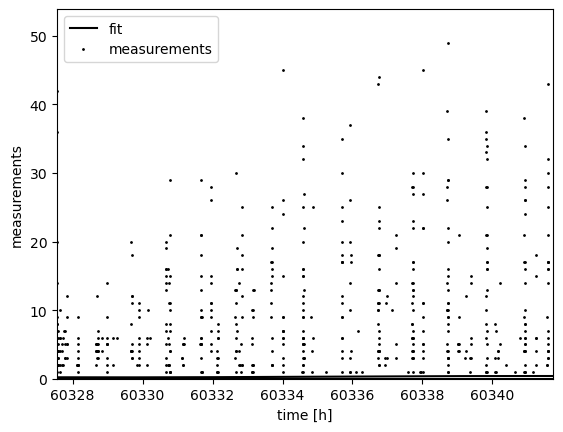

[ 4.05682027e-01  1.00582633e-01 -5.15590690e-07 -1.80094773e-06
  1.08626731e-02  2.40020927e+01] {'p': 0.0009959499410326922, 'p_reject': 1.1102230246251565e-16, 'SNR': 0.031698219576786826, 'RSS': 108738.55000775655, 'resid_SE': 2.30790047550527, 'ME': 4.523670011011291} {'params': {'A': 0.40568202711201984, 'B': 0.1005826328139494, 'C': -5.155906904952669e-07, 'D': -1.8009477274482337e-06, 'acrophase': 0.010862673145296143, 'period': 24.002092697826725}, 'p_values': {'A': 0.9997955804836369, 'B': 0.999978676344105, 'C': 0.9999993369681446, 'D': 0.9999452542652549, 'acrophase': 0.9999703322669655, 'period': 0.0}, 'CIs': {'A': [-3103.2389583808936, 3104.050322435118], 'B': [-7376.731827521747, 7376.932992787374], 'C': [-1.2161284263469165, 1.2161273951655354], 'D': [-0.051448723560530894, 0.051445121665076], 'acrophase': [-572.6017804075574, 572.623505753848], 'period': [23.12424646405239, 24.87993893160106]}}
The approximated period is: 24.002092697826725


In [21]:
cosinor_period_approx(df, 'Sp25')

# Cosinor Period Approximation: Periodogram Version

In [23]:
#nonlinear cosinor model for period estimate 
from CosinorPy import cosinor_nonlin
from scipy import signal

def cosinor_period_approx_2(df, sp):
    X = df['Time'].apply(datetime_to_jd).values
    Y = df[sp].values
    _, _, statistics_params_basic = cosinor_nonlin.fit_cosinor_basic(X, Y, period=None)
    initial_period = statistics_params_basic['params']['period']
    initial_period_ci = statistics_params_basic['CIs']['period']
    
    # Step 2: Compute the periodogram and identify the dominant period
    frequency, power = LombScargle(X, Y).autopower()
    best_frequency = frequency[np.argmax(power)]
    best_period = 1 / best_frequency
    
    # Step 3: Refine the period estimate using fit_generalized_cosinor
    popt_ext, statistics, statistics_params = cosinor_nonlin.fit_generalized_cosinor(X, Y, period=best_period)
    
    # Print the results
    print("Initial Period Estimate (fit_cosinor_basic):", initial_period)
    print("Initial Period Confidence Interval:", initial_period_ci)
    print("Dominant Period from Periodogram:", best_period)
    print("Refined Period Estimate (fit_generalized_cosinor):", popt_ext[-1])

In [25]:
cosinor_period_approx_2(df, 'Sp25')

Initial Period Estimate (fit_cosinor_basic): 24.002088514737206
Initial Period Confidence Interval: [-1.3224576455799308, 49.32663467505434]
Dominant Period from Periodogram: 0.0003473421420116825
Refined Period Estimate (fit_generalized_cosinor): 0.0003473421420116825


/home/af34660a-87c9-4e82-9a65-44776fda5495/.local/lib/python3.10/site-packages/CosinorPy/cosinor_nonlin.py:132: RuntimeWarning: invalid value encountered in scalar divide
  T0 = popt[i]/perr[i]


# CSV dataframe

In [27]:
data_report = pd.DataFrame(columns=['Group', 'SpiderN', 'Period', 'Date'])

group_info = [group_name for i in range(len(spiders))]

data_report['Group'] = group_info

data_report['SpiderN'] = spiders

#for i, data in enumerate(new_data):
#    df.loc[len(df)] = [group_list[i]] + data[1:]

data_report

#period_LS(df, 'Sp17', 1, 7)

,Group,SpiderN,Period,Date
0,StA,3,NaN,NaN
1,StA,4,NaN,NaN
2,StA,5,NaN,NaN
3,StA,6,NaN,NaN
4,StA,7,NaN,NaN
5,StA,9,NaN,NaN
6,StA,10,NaN,NaN
7,StA,11,NaN,NaN
8,StA,12,NaN,NaN
9,StA,13,NaN,NaN


# Raster plot separator

In [49]:
"""

raster plot: LD/DD/LL separation 
user must manually put in day range and LD/LL/DD (may automate second part later)
Parameters that I changed: first day that you would like to select (inclusive), last 

"""
def raster_separate(first_day, last_day, expr_type, sp, fig):
    
    for j in range(first_day, last_day + 1):
        curr_df = df[df['Day']==j]
        #display(curr_df[200:205])
        
        curr_df_avg = curr_df.groupby(curr_df['Time'].dt.hour)[sp].mean()
    
        ax = fig.add_subplot(last_day + 1, 1, j)
        ax.set_ylabel(f"Day {j}", rotation="horizontal", va="center", ha="right", fontsize=8)

        
        for k in range(0, len(curr_df) -1):
            start_time = curr_df['Time'].iloc[k]
            end_time = curr_df['Time'].iloc[k + 1]
            if curr_df['Light'].iloc[k] == 1:
                ax.axvspan(start_time.hour + start_time.minute / 60, end_time.hour + end_time.minute / 60, color='yellow', alpha=0.3)

        curr_df_avg.plot.bar(y = [sp], ax=ax)
        
        ax.set_ylim(0, 1)
        ax.legend().remove()
        ax.tick_params(left=False, bottom=False)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xlim(-0.5, 23.5)
        ax.set_xlabel("")
        
        if j == first_day:
            ax.set_title(sp)
            #ax.text(0.5, 1.5, x, fontsize=12, horizontalalignment='center', transform=ax.transAxes)
            
        if j == last_day:
            ax.set_xticks(np.arange(0, 25, 2))
            ax.set_xticklabels(np.arange(0, 25, 2), rotation = 'horizontal', fontsize = 7)
            ax.set_xlabel('Time (hours)')

    if not os.path.exists("Raster_plots"):
            os.makedirs("Raster_plots")
    
    file_path = os.path.join("Raster_plots", f"{sp}_raster_plot_{expr_type}.png")
    plt.savefig(file_path)
    #plt.close()
    plt.show()

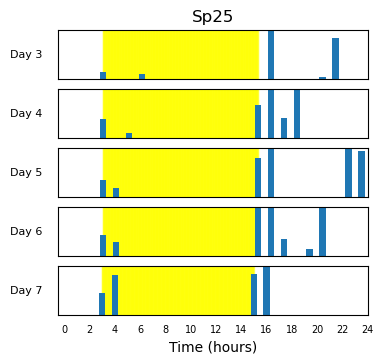

In [53]:
for i in range(25, 26):
    x = f"Sp{i}"
    fig = plt.figure(figsize=(4, 6))
    raster_separate(3, 7, "DD", x, fig)